# Import

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Read dataset
file_path = "Study Case DA.xlsx"

In [13]:
# Menampilkan semua kolom tanpa terpotong
pd.set_option('display.max_columns', None)

# Dataframe & Sheets

In [14]:
strength = pd.read_excel(file_path, sheet_name="strengths")

In [15]:
display(strength.head())

,employee_id,rank,theme
0,EMP100000,1,NaN
1,EMP100001,1,Responsibility
2,EMP100002,1,Restorative
3,EMP100003,1,Belief
4,EMP100004,1,Deliberative


In [16]:
import pandas as pd

file_path = "performance_employees_adjusted.xlsx"
base = pd.read_excel(file_path)

# Ambil hanya kolom yang dibutuhkan
base = base[['employee_id', 'rating', 'year']]

In [17]:
display(base.shape)
display(base)

(8084, 3)

,employee_id,rating,year
0,EMP100000,2.0,2021
1,EMP100002,2.0,2021
2,EMP100005,NaN,2021
3,EMP100006,4.0,2021
4,EMP100007,4.0,2021
...,...,...,...
8079,DUP1942,5.0,2025
8080,DUP2096,3.0,2025
8081,DUP4177,2.0,2025
8082,DUP9801,5.0,2025


# EDA

# Outlier Score

### Performance

In [18]:
display(strength.shape)
display(strength)

(28140, 3)

,employee_id,rank,theme
0,EMP100000,1,NaN
1,EMP100001,1,Responsibility
2,EMP100002,1,Restorative
3,EMP100003,1,Belief
4,EMP100004,1,Deliberative
...,...,...,...
28135,DUP1942,14,Woo
28136,DUP2096,14,Consistency
28137,DUP4177,14,Relator
28138,DUP9801,14,Ideation


In [19]:
# Ubah data Strength ke format wide
strength_wide = (
    strength
    .pivot(index='employee_id', columns='rank', values='theme')
    .reset_index()
)

# Ubah nama kolom agar lebih informatif
strength_wide.columns = ['employee_id'] + [f'strength_rank_{int(c)}' for c in strength_wide.columns[1:]]

# Lihat hasil
display(strength_wide.shape)
display(strength_wide.head())


(2010, 15)

,employee_id,strength_rank_1,strength_rank_2,strength_rank_3,strength_rank_4,strength_rank_5,strength_rank_6,strength_rank_7,strength_rank_8,strength_rank_9,strength_rank_10,strength_rank_11,strength_rank_12,strength_rank_13,strength_rank_14
0,DUP1942,Learner,Maximizer,Ideation,Harmony,Restorative,Belief,Input,Significance,Empathy,Connectedness,Positivity,Communication,Individualization,Woo
1,DUP2096,Command,Significance,Competition,Discipline,Woo,Activator,NaN,Strategic,Ideation,Deliberative,Achiever,Learner,NaN,Consistency
2,DUP2722,Individualization,Self-Assurance,NaN,Analytical,Input,Deliberative,NaN,Activator,Belief,Developer,Positivity,Maximizer,Significance,Connectedness
3,DUP3015,Responsibility,Context,Includer,Communication,Ideation,Command,Learner,Intellection,Empathy,Strategic,Deliberative,Arranger,Relator,Positivity
4,DUP3452,Developer,Arranger,Self-Assurance,Futuristic,Learner,Maximizer,Context,Significance,Adaptability,Connectedness,Ideation,Communication,Relator,Strategic


In [20]:
# pastikan kolom employee_id sama tipe datanya
base['employee_id'] = base['employee_id'].astype(str)
strength_wide['employee_id'] = strength_wide['employee_id'].astype(str)

# gabungkan ke base
merged_df = base.merge(strength_wide, on='employee_id', how='left')

# cek hasil
display(merged_df.shape)
display(merged_df.head())


(8084, 17)

,employee_id,rating,year,strength_rank_1,strength_rank_2,strength_rank_3,strength_rank_4,strength_rank_5,strength_rank_6,strength_rank_7,strength_rank_8,strength_rank_9,strength_rank_10,strength_rank_11,strength_rank_12,strength_rank_13,strength_rank_14
0,EMP100000,2.0,2021,NaN,Adaptability,Context,Competition,Activator,Positivity,Significance,Empathy,Ideation,Developer,Communication,Command,Analytical,Intellection
1,EMP100002,2.0,2021,Restorative,Maximizer,Woo,Includer,Command,NaN,Futuristic,Focus,NaN,NaN,Analytical,NaN,NaN,Positivity
2,EMP100005,NaN,2021,Input,Relator,Woo,Deliberative,Consistency,NaN,Includer,Empathy,Restorative,Responsibility,Belief,Learner,Arranger,Significance
3,EMP100006,4.0,2021,Input,Analytical,Responsibility,Maximizer,Self-Assurance,Deliberative,NaN,Achiever,Intellection,Consistency,Discipline,Relator,Arranger,Learner
4,EMP100007,4.0,2021,Connectedness,Strategic,Consistency,Communication,Focus,Positivity,Adaptability,Maximizer,Individualization,Context,Includer,Belief,Discipline,Woo


In [21]:
merged_df.dtypes

employee_id          object
rating              float64
year                  int64
strength_rank_1      object
strength_rank_2      object
strength_rank_3      object
strength_rank_4      object
strength_rank_5      object
strength_rank_6      object
strength_rank_7      object
strength_rank_8      object
strength_rank_9      object
strength_rank_10     object
strength_rank_11     object
strength_rank_12     object
strength_rank_13     object
strength_rank_14     object
dtype: object

In [23]:
# Buat kolom penanda high performer
merged_df['is_high'] = (merged_df['rating'] == 5).astype(int)


In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# pastikan kolom 'is_high' sudah ada (rating == 5 → 1)
# merged_df['is_high'] = (merged_df['rating'] == 5).astype(int)

# Ambil hanya kolom strength rank
strength_cols = [c for c in merged_df.columns if c.startswith('strength_rank_')]

# Ubah dari wide ke long agar bisa dihitung per tema
strength_long = merged_df.melt(
    id_vars=['employee_id', 'is_high'],
    value_vars=strength_cols,
    var_name='rank',
    value_name='theme'
).dropna(subset=['theme'])

# Hitung frekuensi tiap tema per kelompok
theme_freq = (
    strength_long.groupby(['is_high', 'theme'])
    .size()
    .reset_index(name='count')
)

# Normalisasi agar bisa dibandingkan proporsinya
theme_freq['percentage'] = theme_freq.groupby('is_high')['count'].transform(lambda x: x / x.sum() * 100)
theme_freq_high = theme_freq[theme_freq['is_high'] == 1].sort_values('percentage', ascending=False).head(15)
theme_freq_other = theme_freq[theme_freq['is_high'] == 0].sort_values('percentage', ascending=False).head(15)


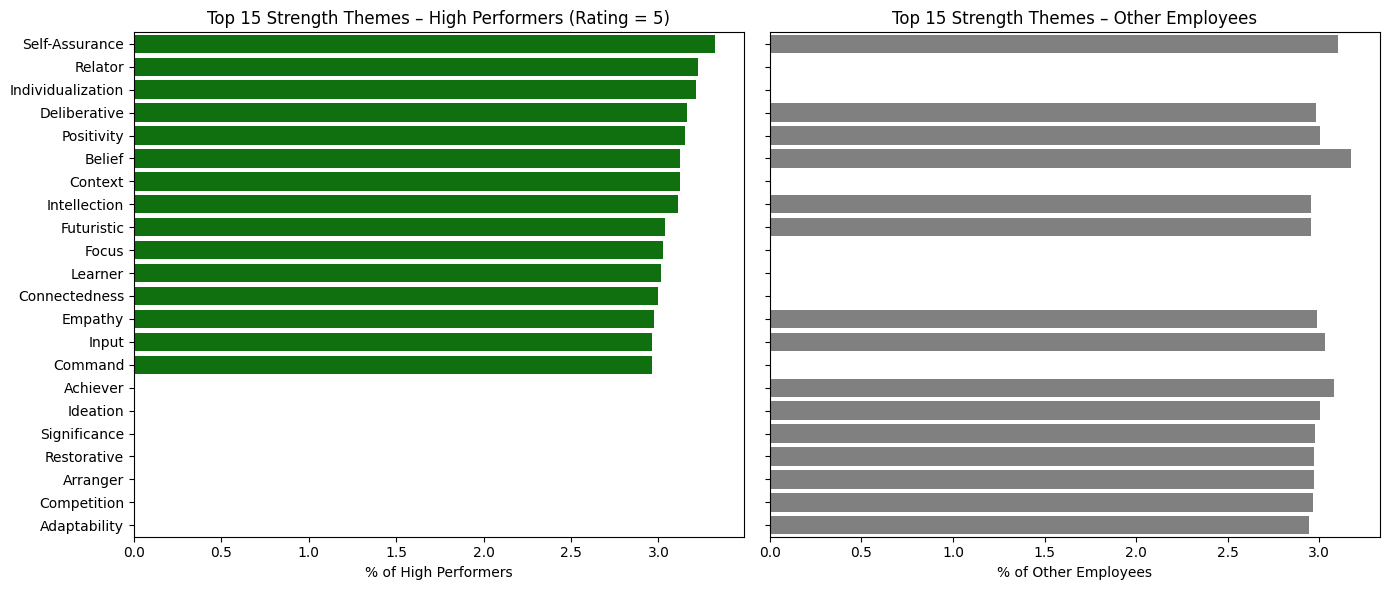

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

sns.barplot(
    data=theme_freq_high,
    y='theme', x='percentage', ax=axes[0], color='green'
)
axes[0].set_title('Top 15 Strength Themes – High Performers (Rating = 5)')
axes[0].set_xlabel('% of High Performers')
axes[0].set_ylabel('')

sns.barplot(
    data=theme_freq_other,
    y='theme', x='percentage', ax=axes[1], color='gray'
)
axes[1].set_title('Top 15 Strength Themes – Other Employees')
axes[1].set_xlabel('% of Other Employees')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()


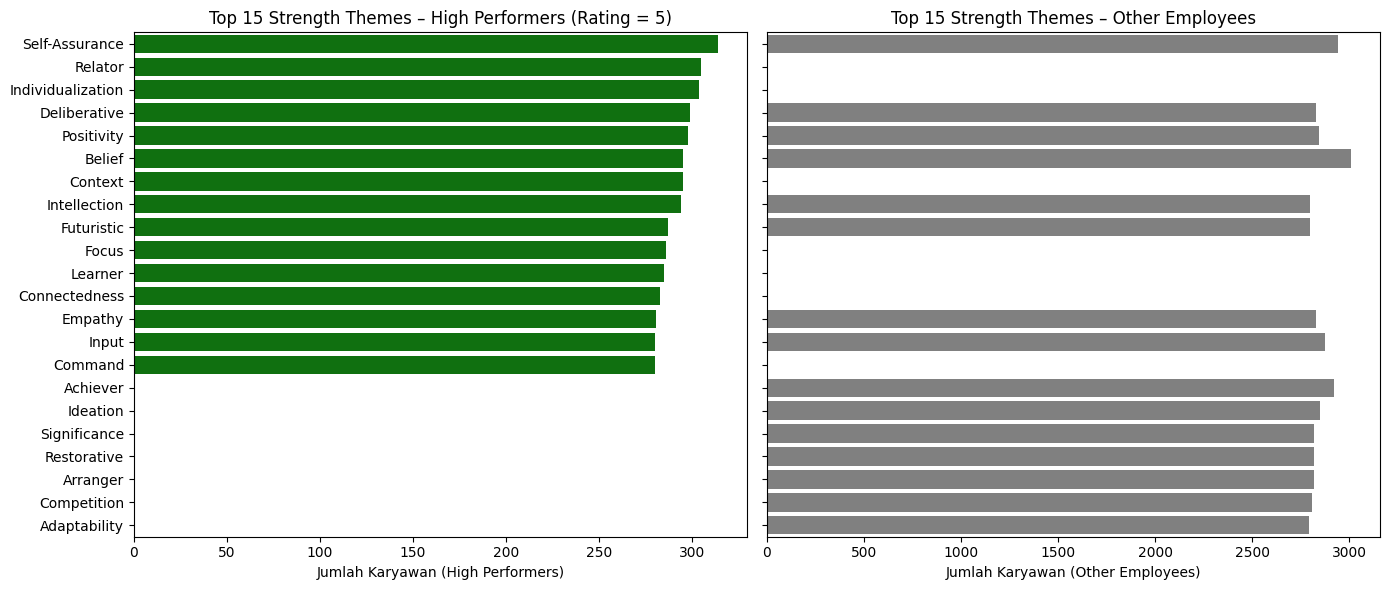

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ambil 15 tema paling sering muncul berdasarkan JUMLAH (bukan persentase)
theme_freq_high = (
    theme_freq[theme_freq['is_high'] == 1]
    .sort_values('count', ascending=False)
    .head(15)
)
theme_freq_other = (
    theme_freq[theme_freq['is_high'] == 0]
    .sort_values('count', ascending=False)
    .head(15)
)

# Buat 2 subplot
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

sns.barplot(
    data=theme_freq_high,
    y='theme', x='count', ax=axes[0], color='green'
)
axes[0].set_title('Top 15 Strength Themes – High Performers (Rating = 5)')
axes[0].set_xlabel('Jumlah Karyawan (High Performers)')
axes[0].set_ylabel('')

sns.barplot(
    data=theme_freq_other,
    y='theme', x='count', ax=axes[1], color='gray'
)
axes[1].set_title('Top 15 Strength Themes – Other Employees')
axes[1].set_xlabel('Jumlah Karyawan (Other Employees)')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()


C:\Users\fajar\AppData\Local\Temp\ipykernel_14416\4163597805.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=theme_gap, y=theme_gap.index, x='Gap', palette='coolwarm')


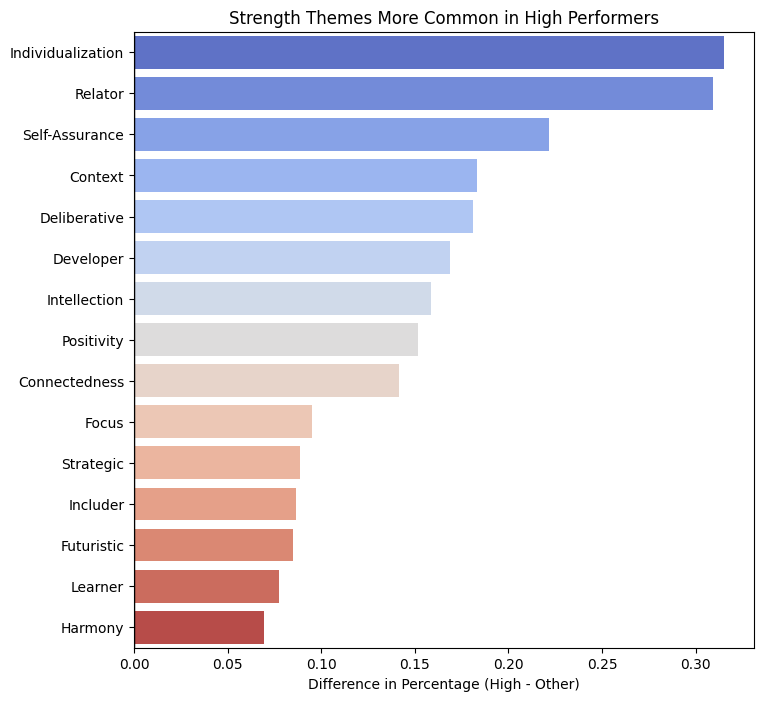

In [29]:
# Pivot agar tiap tema punya dua kolom: high vs other
theme_gap = theme_freq.pivot(index='theme', columns='is_high', values='percentage').fillna(0)
theme_gap.columns = ['Other', 'High']
theme_gap['Gap'] = theme_gap['High'] - theme_gap['Other']
theme_gap = theme_gap.sort_values('Gap', ascending=False).head(15)

# Visualisasi gap
plt.figure(figsize=(8, 8))
sns.barplot(data=theme_gap, y=theme_gap.index, x='Gap', palette='coolwarm')
plt.title('Strength Themes More Common in High Performers')
plt.xlabel('Difference in Percentage (High - Other)')
plt.ylabel('')
plt.axvline(0, color='black', linewidth=1)
plt.show()
